In [1]:
from neural_net_utils import *
from feature_selection_utils import *

### Sfida tra `GradientBoostingRegressor` e `RegressionNet`

#### Feature analysis e selection con `GradientBoostingRegressor` (addestrato sul dataset `movies_not_binned.csv`)

In [2]:
df = pd.read_csv('../dataset/movies_not_binned.csv')

cols_to_retain = ['rating', 'genre', 'score', 'profit', 'age', 'runtime', 'votes', 'budget',
                  'director_num_movies', 'director_age', 'director_profit_mean', 'director_profit_std', 'director_score_mean', 'director_score_std',
                  'actor_num_movies', 'actor_age', 'actor_profit_mean', 'actor_profit_std', 'actor_score_mean', 'actor_score_std']

cols = {
    'target': 'score',
    'drop': list(df.columns.difference(cols_to_retain)),
    'dummies': ['rating', 'genre'],
    'labels': [],
    'round': [],
    'clipping': ['profit', 'votes', 'budget',
                 'director_profit_mean', 'actor_profit_mean',
                 'director_profit_std', 'actor_profit_std'],
    'standardize': ['runtime', 'director_age', 'actor_age'],
    'minmax': ['age', 'profit', 'votes', 'budget',
               'director_num_movies', 'actor_num_movies',
               'director_profit_mean', 'actor_profit_mean',
               'director_profit_std', 'actor_profit_std',
               'director_score_mean', 'actor_score_mean',
               'director_score_std', 'actor_score_std']
}

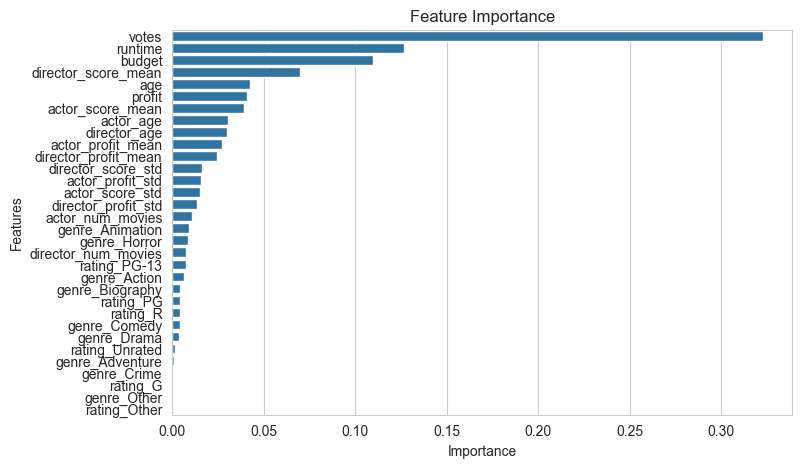

In [3]:
# studio l'importanza delle features
model_name = 'Gradient_Boosting_Regressor-not_binned'

study_model_with_best_features(model_name, df, cols, retain='all')

In [4]:
# scelgo il numero di features da mantenere e procedo con una RFE manuale, poi confronto i risultati

k = 11
study_model_with_best_features(model_name, df, cols, retain=k)

Removing genre_Action with importance 0.0006319223768053162
Removing genre_Other with importance 0.00022694187016503165
Removing actor_num_movies with importance 0.0006798520963452459
Removing genre_Animation with importance 3.8268595964841e-05
Removing director_profit_mean with importance 9.663110530566676e-05
Removing genre_Comedy with importance 0.00011289034632161465
Removing rating_G with importance 0.0006401516174475153
Removing actor_score_mean with importance 0.0004920556345797134
Removing director_num_movies with importance 0.002125276093374928
Removing rating_PG with importance 0.00010361469196501494
Removing genre_Crime with importance 0.00011592610898975009
Removing actor_score_std with importance 0.000531527304211632
Removing genre_Drama with importance 4.82396922030226e-05
Removing actor_profit_std with importance 0.00045307404838035303
Removing director_profit_std with importance 2.5892917855485642e-05
Removing director_age with importance 0.0010256436186258377
Removing 

,feature
0,profit
1,age
2,runtime
3,votes
4,budget
5,director_score_mean
6,director_score_std
7,actor_age
8,actor_profit_mean
9,rating_PG-13


Results after GridSearchCV:
Best parameters: {'max_depth': 4, 'min_samples_leaf': 6, 'min_samples_split': 8}
Best score: {'mean_squared_error': 0.4319}

Results after max_depth tuning:
Best parameters: {'max_depth': 4}
Best score: {'mean_squared_error': 0.4319}



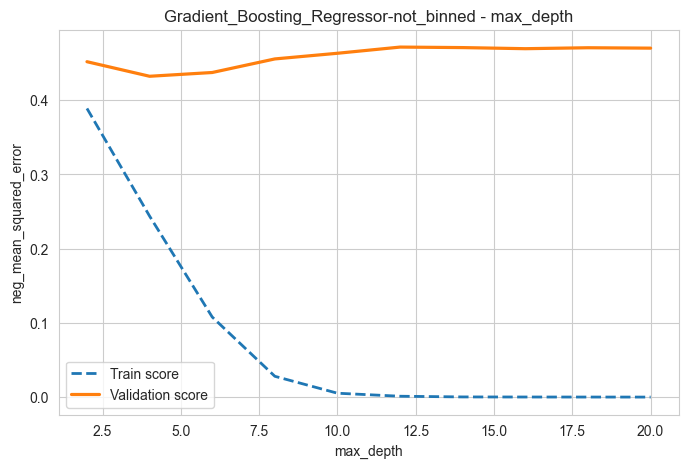

Test score:
MSE: 0.4164


In [4]:
# tuning e test dello stesso modello con le features più importanti
grid_params = {
    'max_depth': [4, 6],
    'min_samples_leaf': [6, 8, 10],
    'min_samples_split': [8, 10, 12],
}

best_features = ['votes', 'runtime', 'budget', 'age', 'profit',
                 'director_score_mean', 'actor_score_mean',
                 'director_profit_mean', 'actor_profit_mean',
                 'director_age', 'actor_age']

study_model_with_best_features(model_name, df, cols, best_features=best_features, grid_params=grid_params, task='regression')

#### Addestramento di `RegressionNet` solo sul dataset originale `movies_v2.csv`

In [3]:
df = pd.read_csv('../dataset/movies_v2.csv')

# colonne per l'addestramento
cols_to_retain = ['rating', 'genre', 'year', 'score', 'votes', 'budget', 'gross', 'runtime']

cols = {
    'target': 'score',
    'drop': list(df.columns.difference(cols_to_retain)),
    'dummies': ['rating', 'genre'],
    'labels': [],
    'round': [],
    'clipping': ['votes', 'budget', 'gross'],
    'standardize': ['runtime'],
    'minmax': ['year', 'votes', 'budget', 'gross']
}

Epoch 1 | train loss: 37.3155, val loss: 16.5371
Epoch 2 | train loss: 7.0664, val loss: 1.6031
Val loss (inf --> 1.6031)
Epoch 3 | train loss: 5.8800, val loss: 1.3043
Val loss (1.6031 --> 1.3043)
Epoch 4 | train loss: 5.7030, val loss: 1.5552
Early-stopping counter: 1/5
Epoch 5 | train loss: 5.5481, val loss: 1.6508
Early-stopping counter: 2/5
Epoch 6 | train loss: 5.2953, val loss: 1.1679
Val loss (1.3043 --> 1.1679)
Epoch 7 | train loss: 5.1733, val loss: 1.0978
Val loss (1.1679 --> 1.0978)
Epoch 8 | train loss: 5.2017, val loss: 1.1985
Early-stopping counter: 1/5
Epoch 9 | train loss: 4.7365, val loss: 1.0391
Val loss (1.0978 --> 1.0391)
Epoch 10 | train loss: 4.6419, val loss: 1.2146
Early-stopping counter: 1/5
Epoch 11 | train loss: 4.5928, val loss: 1.3659
Early-stopping counter: 2/5
Epoch 12 | train loss: 4.5010, val loss: 1.1193
Early-stopping counter: 3/5
Epoch 13 | train loss: 4.3968, val loss: 0.9958
Val loss (1.0391 --> 0.9958)
Epoch 14 | train loss: 4.2122, val loss: 1.0

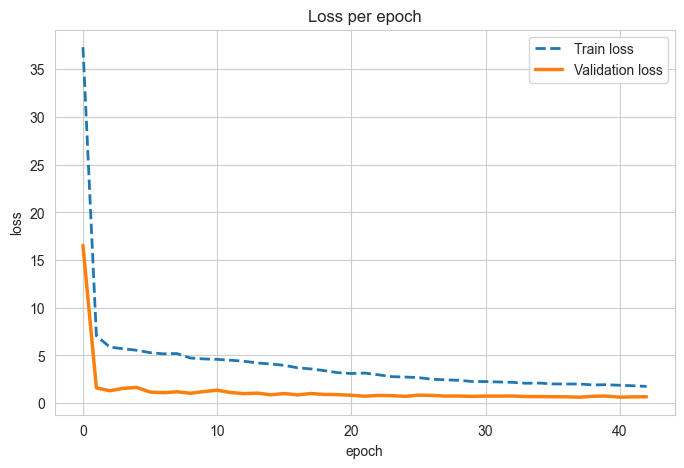


Test loss: 0.5138


c:\Users\raffa\OneDrive\Desktop\Compilatori\ProgettiPython\ProgettoIconFilm\ProgettoICon-MovieInsider\source\neural_net_utils.py:318: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feat

In [4]:
train_and_test_net(df, cols, task='regression')

#### Addestramento di `RegressionNet` solo sul dataset `movies_not_binned.csv` (solo con le $k$ features più importanti)

In [5]:
df = pd.read_csv('../dataset/movies_not_binned.csv')

cols_to_retain = ['rating', 'genre', 'score', 'profit', 'age', 'runtime', 'votes', 'budget',
                  'director_num_movies', 'director_age', 'director_profit_mean', 'director_profit_std', 'director_score_mean', 'director_score_std',
                  'actor_num_movies', 'actor_age', 'actor_profit_mean', 'actor_profit_std', 'actor_score_mean', 'actor_score_std']

cols = {
    'target': 'score',
    'drop': list(df.columns.difference(cols_to_retain)),
    'dummies': ['rating', 'genre'],
    'labels': [],
    'round': [],
    'clipping': ['profit', 'votes', 'budget',
                 'director_profit_mean', 'actor_profit_mean',
                 'director_profit_std', 'actor_profit_std'],
    'standardize': ['runtime', 'director_age', 'actor_age'],
    'minmax': ['age', 'profit', 'votes', 'budget',
               'director_num_movies', 'actor_num_movies',
               'director_profit_mean', 'actor_profit_mean',
               'director_profit_std', 'actor_profit_std',
               'director_score_mean', 'actor_score_mean',
               'director_score_std', 'actor_score_std']
}

Epoch 1 | train loss: 34.3156, val loss: 4.6366
Epoch 2 | train loss: 6.3481, val loss: 1.8725
Val loss (inf --> 1.8725)
Epoch 3 | train loss: 5.8112, val loss: 1.7776
Val loss (1.8725 --> 1.7776)
Epoch 4 | train loss: 5.4917, val loss: 1.6587
Val loss (1.7776 --> 1.6587)
Epoch 5 | train loss: 5.1501, val loss: 1.6049
Val loss (1.6587 --> 1.6049)
Epoch 6 | train loss: 5.1649, val loss: 1.3729
Val loss (1.6049 --> 1.3729)
Epoch 7 | train loss: 4.9038, val loss: 1.1332
Val loss (1.3729 --> 1.1332)
Epoch 8 | train loss: 5.0753, val loss: 1.3739
Early-stopping counter: 1/5
Epoch 9 | train loss: 4.8604, val loss: 1.5671
Early-stopping counter: 2/5
Epoch 10 | train loss: 4.5636, val loss: 1.0031
Val loss (1.1332 --> 1.0031)
Epoch 11 | train loss: 4.3493, val loss: 0.8973
Val loss (1.0031 --> 0.8973)
Epoch 12 | train loss: 4.4057, val loss: 0.9820
Early-stopping counter: 1/5
Epoch 13 | train loss: 4.3271, val loss: 0.8264
Val loss (0.8973 --> 0.8264)
Epoch 14 | train loss: 4.2873, val loss: 1

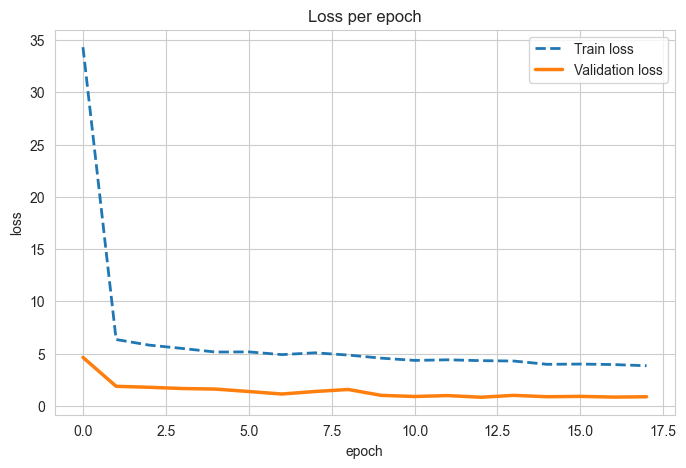


Test loss: 0.7484


c:\Users\raffa\OneDrive\Desktop\Compilatori\ProgettiPython\ProgettoIconFilm\ProgettoICon-MovieInsider\source\neural_net_utils.py:318: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feat

In [6]:
best_features = ['votes', 'runtime', 'budget', 'age', 'profit',
                 'director_score_mean', 'actor_score_mean',
                 'director_profit_mean', 'actor_profit_mean',
                 'director_age', 'actor_age']

train_and_test_net(df, cols, features=best_features, task='regression')

### Sfida tra `RandomForestClassifier` e `ClassificationNet`

#### Feature analysis e selection con `RandomForestClassifier` (addestrato sul dataset `movies_not_binned.csv`)

In [5]:
df = pd.read_csv('../dataset/movies_not_binned.csv')

# colonne per l'addestramento
cols_to_retain = ['rating', 'genre', 'profitability', 'cultness', 'age', 'runtime', 'budget',
                  'director_num_movies', 'director_age', 'director_profit_mean', 'director_profit_std', 'director_score_mean', 'director_score_std',
                  'actor_num_movies', 'actor_age', 'actor_profit_mean', 'actor_profit_std', 'actor_score_mean', 'actor_score_std']

cols = {
    'target': 'profitability',
    'drop': list(df.columns.difference(cols_to_retain)),
    'dummies': ['rating', 'genre'],
    'labels': [],
    'round': [],
    'clipping': ['budget', 'director_profit_mean', 'actor_profit_mean',
                 'director_profit_std', 'actor_profit_std'],
    'standardize': ['cultness', 'runtime', 'director_age', 'actor_age'],
    'minmax': ['age', 'budget', 'director_num_movies', 'actor_num_movies',
               'director_profit_mean', 'actor_profit_mean',
               'director_profit_std', 'actor_profit_std',
               'director_score_mean', 'actor_score_mean',
               'director_score_std', 'actor_score_std']
}

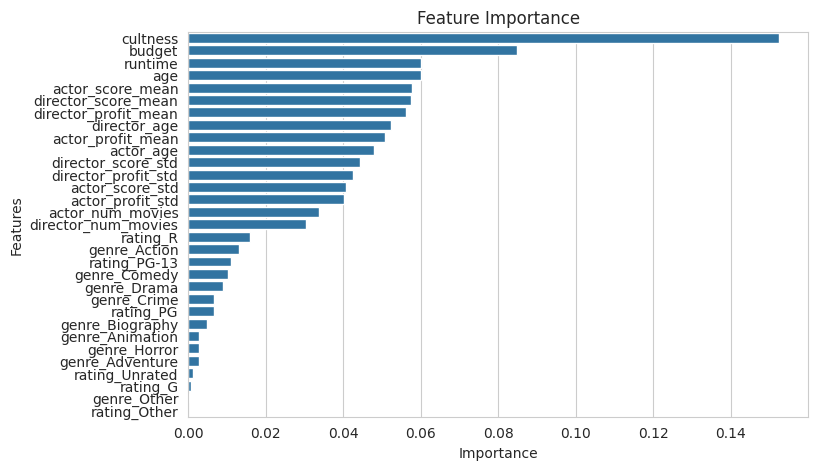

In [6]:
model_name = 'Random_Forest_Classifier-not_binned'

study_model_with_best_features(model_name, df, cols, retain='all')

In [ ]:
# scelgo il numero di features da mantenere e procedo con una RFE manuale, poi confronto i risultati

k = 14
study_model_with_best_features(model_name, df, cols, retain=k, resample=True, task='classification')